In [1]:
import matplotlib.pyplot as plt
import sys  
sys.path.insert(0, '/Users/szczekulskij/side_projects/long-term-analysis-of-pws')
from src.generate_df import get_data_df
from src.graphs import graph_agg_metric_over_nr_sessions, graph_based_on_time_bucket
from src.anovas import bucketed_anova

# Main graphs:





anova results:
buckets: [1, 3, 6, 9, 12, 15]
p_value: 1.4777060832794697e-15

statistics between 1 - 2 bucket and 3 - 5 bucket
means: 24.95 vs 41.41
p-value: 0.0

statistics between 3 - 5 bucket and 6 - 8 bucket
means: 41.41 vs 54.01
p-value: 0.00026

statistics between 6 - 8 bucket and 9 - 11 bucket
means: 54.01 vs 53.35
p-value: 0.56322

statistics between 9 - 11 bucket and 12 - 14 bucket
means: 53.35 vs 55.44
p-value: 0.32549



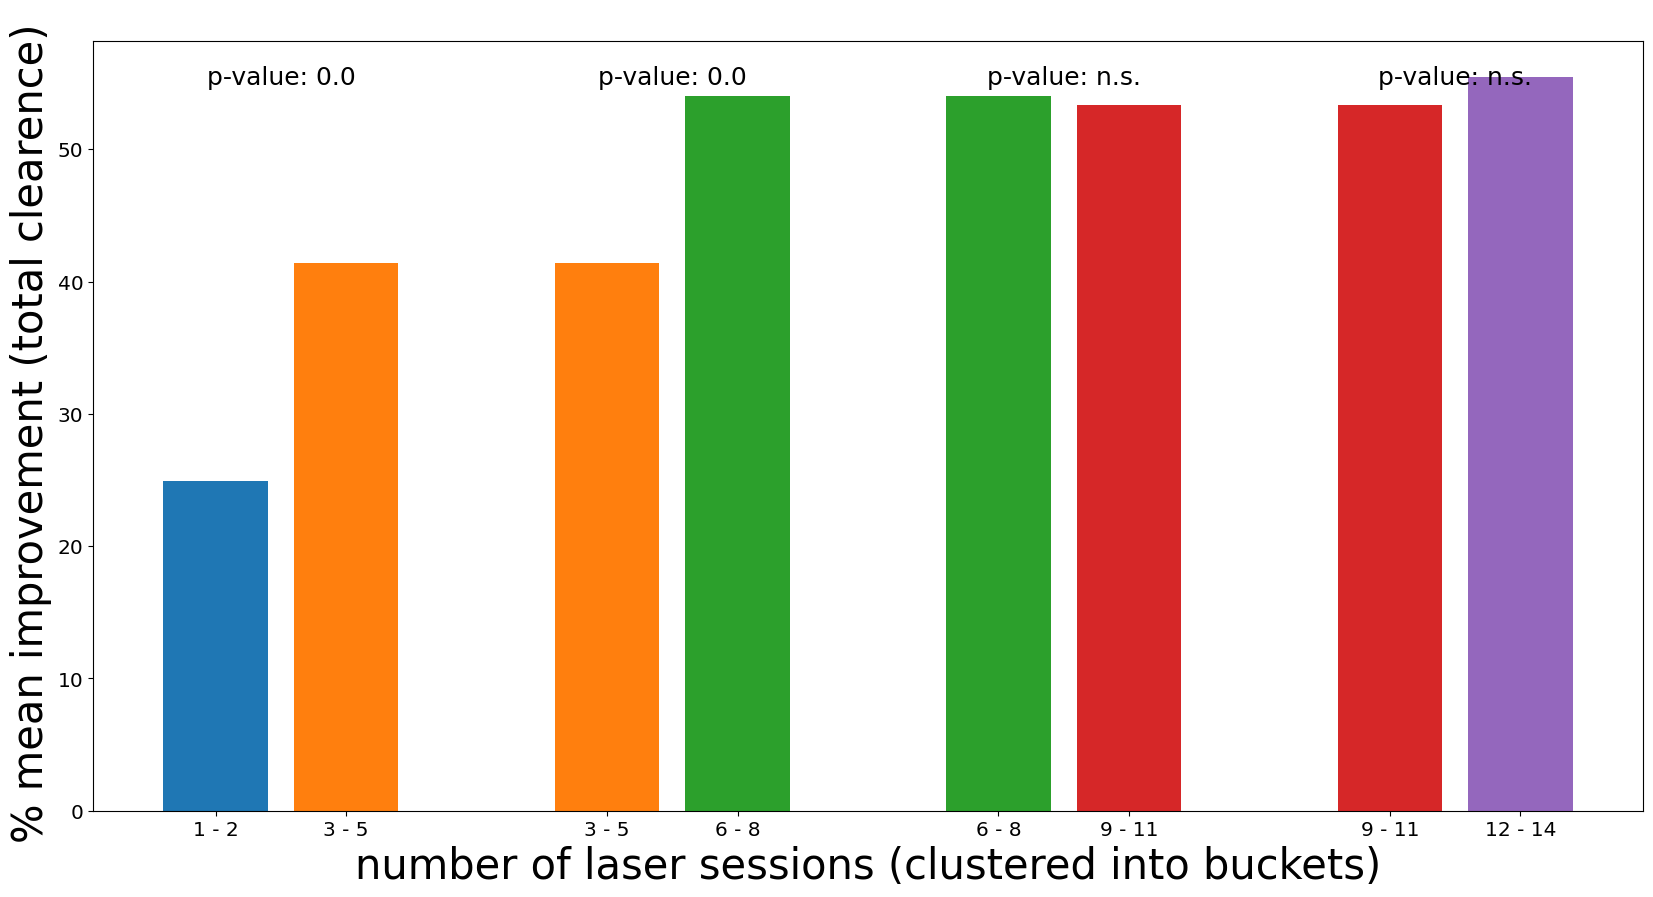

In [4]:
plt.figure(figsize=(20,10))
plt.ylabel("% mean improvement (total clearence) ", size = 30)
plt.xlabel("number of laser sessions (clustered into buckets)", size = 30)
bucketed_anova(
    bucket_column = "visit_nr",
    metric = "total_GCE",
    # buckets = [1,3,6,10,15,],
    buckets = [1,3,6,9,12,15],
    ttest_type = "less",
    p_value_text_height = 54.50
)

buckets:  [0, 120, 240, 360, 480]
['0 - 120', '120 - 240', '240 - 360', '360 - 480', '480+']


/usr/local/lib/python3.10/site-packages/pandas/core/apply.py:507: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  return self._try_aggregate_string_function(obj, f, *self.args, **self.kwargs)


,bucket,patients_per_bucket
0,0 - 120,276
1,120 - 240,37
2,240 - 360,8
3,360 - 480,3
4,480+,8


Text(0, 0.5, '% mean improvement inbetween consecutive visits')

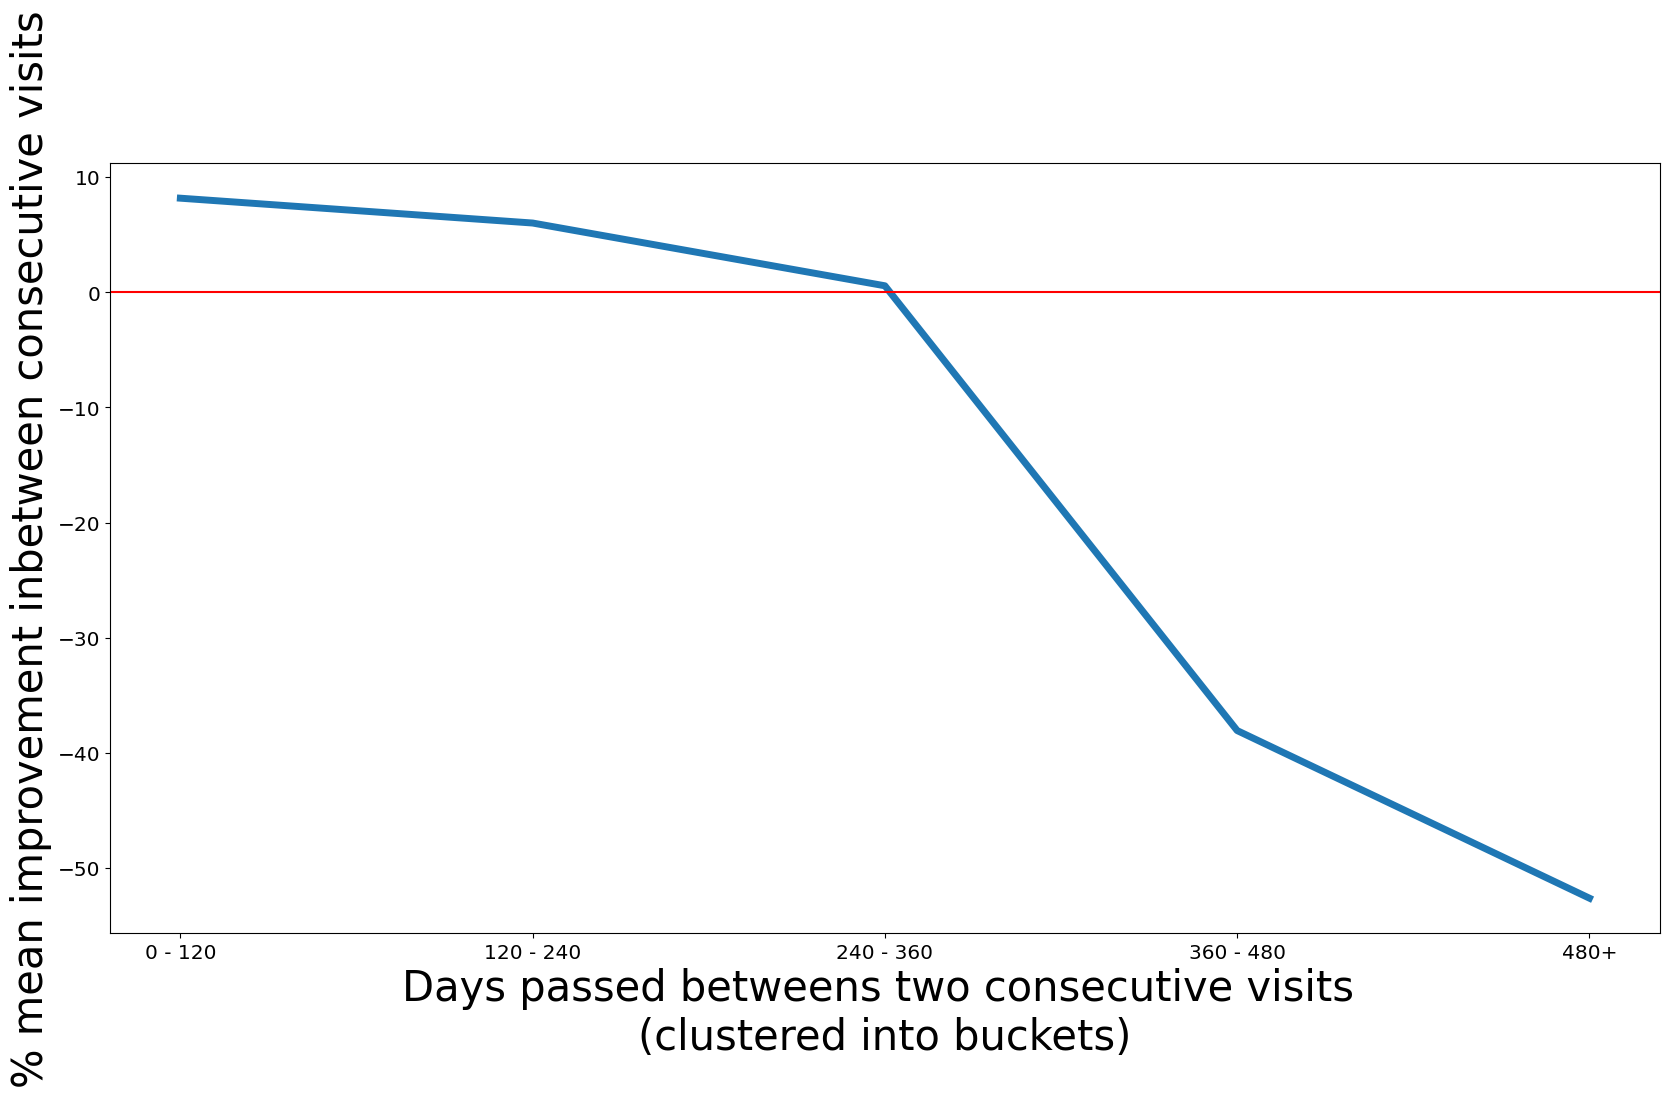

In [9]:
plt.figure(figsize=(20,10))
graph_based_on_time_bucket("inbetween_GCE", buckets_nr = 5, increment = 120)
plt.xlabel("Days passed betweens two consecutive visits \n(clustered into buckets)", size = 30)
plt.ylabel("% mean improvement inbetween consecutive visits", size = 30)





anova results:
buckets: [0, 120, 240, 360, 480, 10000]
p_value: 9.470636055744735e-11

statistics between 0 - 119 bucket and 120 - 239 bucket
means: 8.19 vs 6.36
p-value: 0.32687

statistics between 120 - 239 bucket and 240 - 359 bucket
means: 6.36 vs 0.57
p-value: 0.32563

statistics between 240 - 359 bucket and 360 - 479 bucket
means: 0.57 vs -38.08
p-value: 0.1017

statistics between 360 - 479 bucket and 360+ bucket
means: -38.08 vs -62.8
p-value: 0.31947



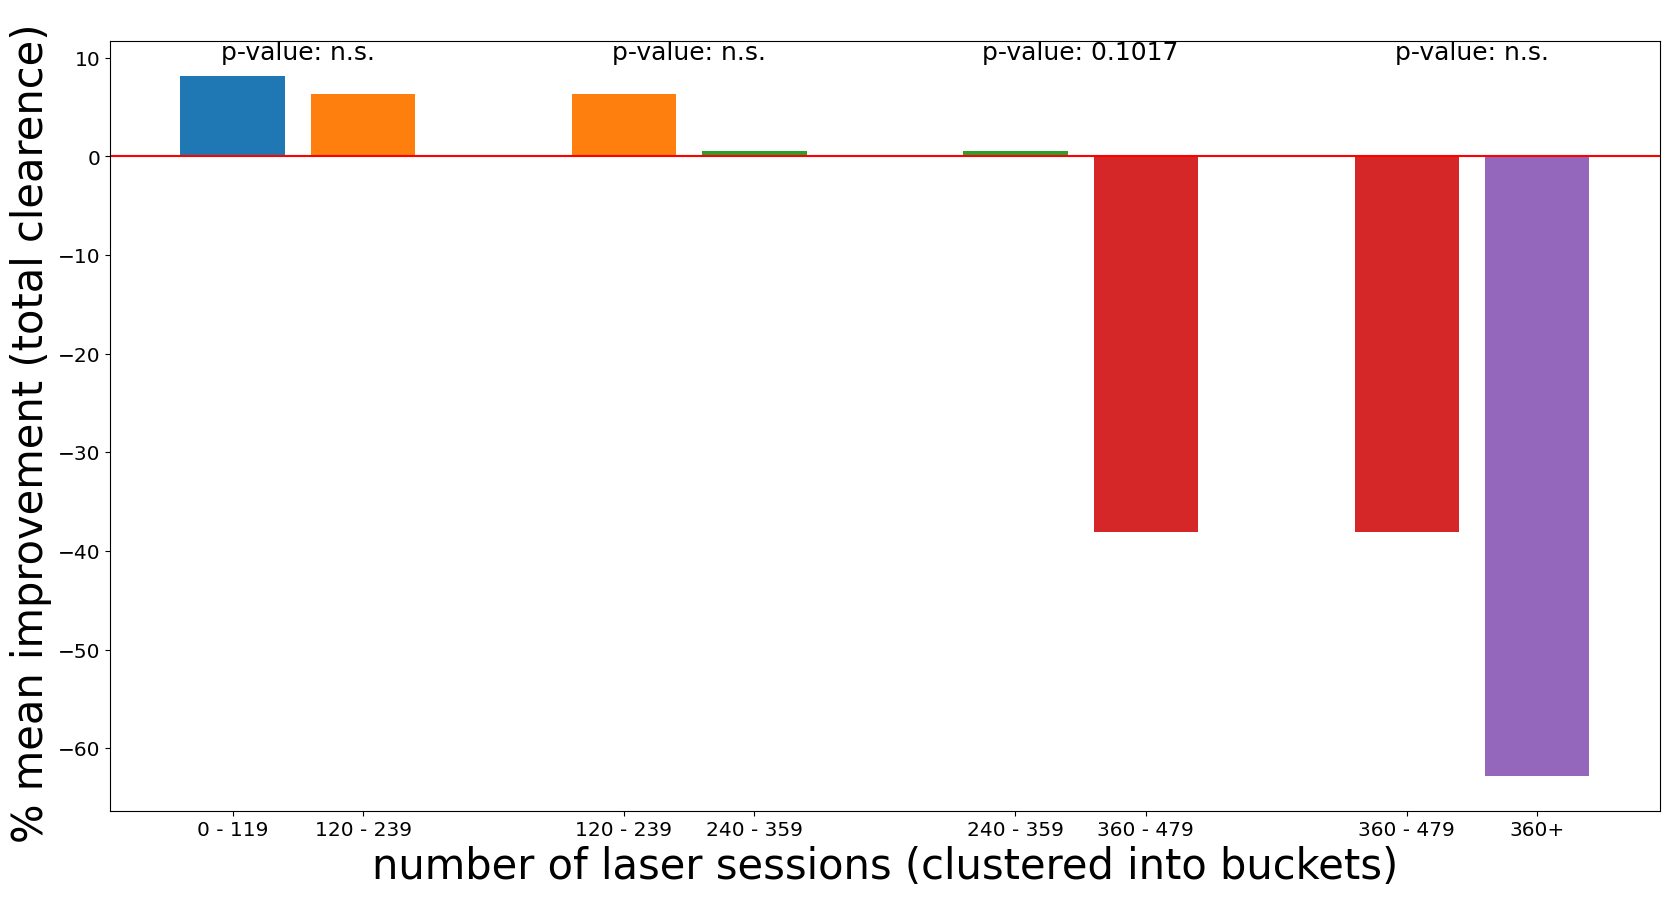

In [12]:
plt.figure(figsize=(20,10))
plt.ylabel("% mean improvement (total clearence) ", size = 30)
plt.xlabel("number of laser sessions (clustered into buckets)", size = 30)
plt.axhline(y=0, color='r', linestyle='-')
bucketed_anova(
    bucket_column = "time",
    metric = "inbetween_GCE",
    buckets = [0,120,240,360,480, 10000],
    ttest_type = "greater",
    p_value_text_height = 9.3,
    last_bucket_label = "360+"
)